In [389]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
data_path = ('/Users/cappsjr/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt')

amazon_cells = pd.read_csv(data_path, delimiter = '\t', header = None)
amazon_cells.columns = ['Message', 'Sentiment']

In [391]:
amazon_cells["Message"].head()

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: Message, dtype: object

# Baseline Performance

In [392]:
print(len(amazon_cells[amazon_cells["Sentiment"]==1]) / len(amazon_cells) * 100, '%')

50.0 %


In this particular case, there is no class imbalance.  There are equal numbers of positive reviews and negative reviews.  Therefore, if the classifiers accurately predict the category of more than 50.0% of the reviews, they will be more successful than the baseline performance.

# First Iteration

In [393]:
keywords = ['good', 'great', 'excellent', 'satisfied','impressed', 'happy', 'love', 'loved', 'like', 
            'liked', 'nice', 'pleased', 'amazing', 'awesome', 'excited', 'best', 'cool','fun', 'rocks']

for key in keywords:
    amazon_cells[str(key)] = amazon_cells.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [394]:
amazon_cells['Sentiment'] = (amazon_cells['Sentiment'] == 1)

In [395]:
data = amazon_cells[keywords]
target = amazon_cells['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)


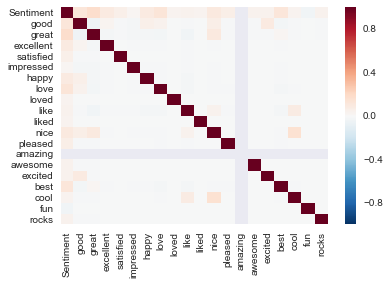

In [396]:
sns.heatmap(amazon_cells.corr())

# Success Rate: 1st Iteration

In [397]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 370


In [398]:
print("Percent of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum() / len(data) * 100
), '%')

Percent of mislabeled points out of a total 1000 points : 37.0 %


# Confusion Matrix: 1st Iteration

In [353]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[472,  28],
       [342, 158]])

False Positives: 28 

False Negatives: 342

Sensitivity: 158

Specificity: 472

# Test with Holdout Group

In [432]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(amazon_cells, test_size = 0.2)

In [433]:
data_train = train[keywords]
target_train = train['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data_train, target_train).predict(data_train)

In [434]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != y_pred).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != y_pred).sum() / len(data_train) * 100
), '%')

Number of MISLABELED points out of a total 800 points : 298
Percent of INCORRECTLY labeled points out of a total 800 points : 37.25 %


In [435]:
data_test = test[keywords]
target_test = test['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data_test, target_test).predict(data_test)

In [436]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred).sum() / len(data_test) * 100
), '%')

Number of MISLABELED points out of a total 200 points : 70
Percent of INCORRECTLY labeled points out of a total 200 points : 35.0 %


# Second Iteration

In [354]:
amazon_cells1 = pd.read_csv(data_path, delimiter = '\t', header = None)
amazon_cells1.columns = ['Message', 'Sentiment']

keywords_1 = ['good', 'great', 'excellent', 'satisfied','impressed', 'happy', 'love','loved', 'like', 
              'liked', 'nice', 'pleased', 'awesome', 'excited', 'best', 'cool','fun', 'rocks', 
              'fantastic', 'works', 'incredible']

for key in keywords_1:
    amazon_cells1[str(key)] = amazon_cells1.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [355]:
data_1 = amazon_cells1[keywords_1]
target_1 = amazon_cells1['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_1, target_1)

y_pred_1 = bnb.predict(data_1)


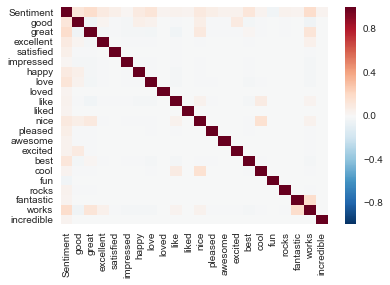

In [356]:
sns.heatmap(amazon_cells1.corr())

# Success Rate: 2nd Iteration

In [357]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_1.shape[0],
    (target_1 != y_pred_1).sum()
))

Number of mislabeled points out of a total 1000 points : 347


In [358]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_1.shape[0],
    (target_1 != y_pred_1).sum() / len(amazon_cells1) * 100
), '%')

Number of mislabeled points out of a total 1000 points : 34.699999999999996 %


# Confusion Matrix: 2nd Iteration

In [359]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_1, y_pred_1)

array([[472,  28],
       [319, 181]])

False Positives: 28

False Negatives: 319

Sensitivity: 181

Specificity: 472

# Holdover Group Test: 2nd Iteration

In [424]:
train1, test1 = train_test_split(amazon_cells1, test_size = 0.2)

In [429]:
data_train1 = train1[keywords_1]
target_train1 = train1['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_1 = bnb.fit(data_train1, target_train1).predict(data_train1)

In [431]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_train1.shape[0],
    (target_train1 != y_pred_1).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_train1.shape[0],
    (target_train1 != y_pred_1).sum() / len(data_train1) * 100
), '%')

Number of MISLABELED points out of a total 800 points : 283
Percent of INCORRECTLY labeled points out of a total 800 points : 35.375 %


In [437]:
data_test1 = test1[keywords_1]
target_test1 = test1['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_1 = bnb.fit(data_test1, target_test1).predict(data_test1)

In [438]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_test1.shape[0],
    (target_test1 != y_pred_1).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_test1.shape[0],
    (target_test1 != y_pred_1).sum() / len(data_test1) * 100
), '%')

Number of MISLABELED points out of a total 200 points : 64
Percent of INCORRECTLY labeled points out of a total 200 points : 32.0 %


# Third Iteration

In [360]:
amazon_cells2 = pd.read_csv(data_path, delimiter = '\t', header = None)
amazon_cells2.columns = ['Message', 'Sentiment']
 
keywords_2 = ['good', 'great', 'excellent', 'satisfied', 'impressed', 'happy', 'love','loved', 'like', 
              'liked', 'nice', 'pleased', 'awesome', 'excited', 'best', 'cool','fun', 'rocks', 
              'fantastic', 'works', 'incredible', 
              'wonderful', 'functions', 'functioning', 'adequate']

for key in keywords_2:
    amazon_cells2[str(key)] = amazon_cells2.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [361]:
data_2 = amazon_cells2[keywords_2]
target_2 = amazon_cells2['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_2, target_2)

y_pred_2 = bnb.predict(data_2)


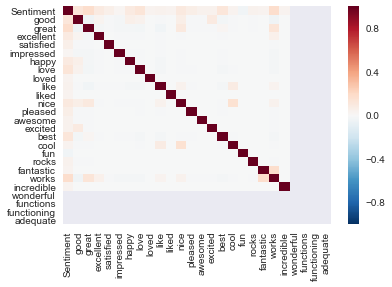

In [362]:
sns.heatmap(amazon_cells2.corr())

# Success Rate: 3rd Iteration

In [363]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred_2).sum()
))

Number of mislabeled points out of a total 1000 points : 347


In [364]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred_2).sum() / len(amazon_cells2) * 100
), '%')

Number of mislabeled points out of a total 1000 points : 34.699999999999996 %


# Confusion Matrix: 3rd Iteration

In [365]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_2, y_pred_2)

array([[472,  28],
       [319, 181]])

False Positive: 28

False Negative: 319

Sensitivity: 181

Specificity: 472

# Holdover Group Test: 3rd Iteration

In [439]:
train2, test2 = train_test_split(amazon_cells2, test_size = 0.2)

In [440]:
data_train2 = train2[keywords_2]
target_train2 = train2['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_2 = bnb.fit(data_train2, target_train2).predict(data_train2)

In [441]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_train2.shape[0],
    (target_train2 != y_pred_2).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_train2.shape[0],
    (target_train2 != y_pred_2).sum() / len(data_train2) * 100
), '%')

Number of MISLABELED points out of a total 800 points : 282
Percent of INCORRECTLY labeled points out of a total 800 points : 35.25 %


In [442]:
data_test2 = test2[keywords_2]
target_test2 = test2['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_2 = bnb.fit(data_test2, target_test2).predict(data_test2)

In [443]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_test2.shape[0],
    (target_test2 != y_pred_2).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_test2.shape[0],
    (target_test2 != y_pred_2).sum() / len(data_test2) * 100
), '%')

Number of MISLABELED points out of a total 200 points : 61
Percent of INCORRECTLY labeled points out of a total 200 points : 30.5 %


# Fourth Iteration

In [366]:
amazon_cells3 = pd.read_csv(data_path, delimiter = '\t', header = None)
amazon_cells3.columns = ['Message', 'Sentiment']
 
keywords_3 = ['good', 'great', 'excellent', 'satisfied', 'impressed', 'happy', 'love','loved', 'like', 
              'liked', 'nice', 'pleased', 'awesome', 'excited', 'best', 'cool','fun', 'rocks', 
              'fantastic', 'works', 'incredible', 
              'fast', 'fastest', 'unbelievable']

for key in keywords_3:
    amazon_cells3[str(key)] = amazon_cells3.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [367]:
data_3 = amazon_cells3[keywords_3]
target_3 = amazon_cells3['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_3, target_3)

y_pred_3 = bnb.predict(data_3)


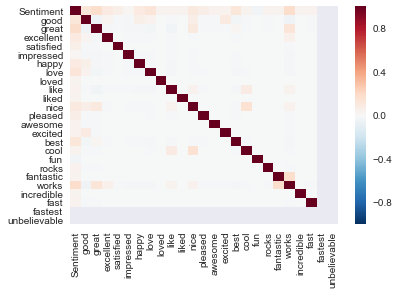

In [368]:
sns.heatmap(amazon_cells3.corr())

# Success Rate: 4th Iteration

In [369]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_3.shape[0],
    (target_3 != y_pred_3).sum()
))

Number of mislabeled points out of a total 1000 points : 345


In [370]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_3.shape[0],
    (target_3 != y_pred_3).sum() / len(amazon_cells3) * 100
), '%')

Number of mislabeled points out of a total 1000 points : 34.5 %


# Confusion Matrix: 4th Iteration

In [371]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_3, y_pred_3)

array([[472,  28],
       [317, 183]])

False Positives: 28

False Negatives: 317

Sensitivity: 183

Specificity: 472

# Holdover Group Test: 4th Iteration

In [444]:
train3, test3 = train_test_split(amazon_cells3, test_size = 0.2)

In [445]:
data_train3 = train3[keywords_3]
target_train3 = train3['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_3 = bnb.fit(data_train3, target_train3).predict(data_train3)

In [446]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_train3.shape[0],
    (target_train3 != y_pred_3).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_train3.shape[0],
    (target_train3 != y_pred_3).sum() / len(data_train3) * 100
), '%')

Number of MISLABELED points out of a total 800 points : 277
Percent of INCORRECTLY labeled points out of a total 800 points : 34.625 %


In [447]:
data_test3 = test3[keywords_3]
target_test3 = test3['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_3 = bnb.fit(data_test3, target_test3).predict(data_test3)

In [448]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_test3.shape[0],
    (target_test3 != y_pred_3).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_test3.shape[0],
    (target_test3 != y_pred_3).sum() / len(data_test3) * 100
), '%')

Number of MISLABELED points out of a total 200 points : 68
Percent of INCORRECTLY labeled points out of a total 200 points : 34.0 %


# Fifth Iteration

In [372]:
amazon_cells4 = pd.read_csv(data_path, delimiter = '\t', header = None)
amazon_cells4.columns = ['Message', 'Sentiment']
 
keywords_4 = ['good', 'great', 'excellent', 'satisfied', 'impressed', 'happy', 'love','loved', 'like', 
              'liked', 'nice', 'pleased', 'awesome', 'excited', 'best', 'cool','fun', 'rocks', 
              'fantastic', 'works', 'incredible',  
              'fast', 
             'deal', 'bargain', 'steal']

for key in keywords_4:
    amazon_cells4[str(key)] = amazon_cells4.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [373]:
data_4 = amazon_cells4[keywords_4]
target_4 = amazon_cells4['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_4, target_4)

y_pred_4 = bnb.predict(data_4)


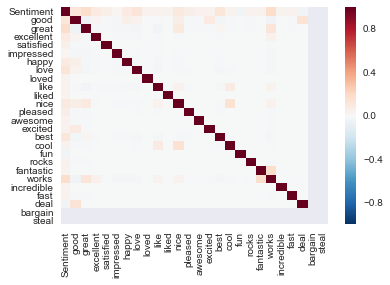

In [374]:
sns.heatmap(amazon_cells4.corr())

# Success Rate: 5th Iteration

In [375]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_4.shape[0],
    (target_4 != y_pred_4).sum()
))

Number of mislabeled points out of a total 1000 points : 345


In [376]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data_4.shape[0],
    (target_4 != y_pred_4).sum() / len(amazon_cells4) * 100
), '%')

Number of mislabeled points out of a total 1000 points : 34.5 %


# Confusion Matrix: 5th Iteration

In [377]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_4, y_pred_4)

array([[472,  28],
       [317, 183]])

False Positives: 28

False Negatives: 317

Sensitivity: 183

Specificity: 472

# Holdover Group Test: 5th Iteration

In [449]:
train4, test4 = train_test_split(amazon_cells4, test_size = 0.2)

In [450]:
data_train4 = train4[keywords_4]
target_train4 = train4['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_4 = bnb.fit(data_train4, target_train4).predict(data_train4)

In [451]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_train4.shape[0],
    (target_train4 != y_pred_4).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_train4.shape[0],
    (target_train4 != y_pred_4).sum() / len(data_train4) * 100
), '%')

Number of MISLABELED points out of a total 800 points : 266
Percent of INCORRECTLY labeled points out of a total 800 points : 33.25 %


In [452]:
data_test4 = test4[keywords_4]
target_test4 = test4['Sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_4 = bnb.fit(data_test4, target_test4).predict(data_test4)

In [453]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    data_test4.shape[0],
    (target_test4 != y_pred_4).sum()
))

print("Percent of INCORRECTLY labeled points out of a total {} points : {}".format(
    data_test4.shape[0],
    (target_test4 != y_pred_4).sum() / len(data_test4) * 100
), '%')

Number of MISLABELED points out of a total 200 points : 75
Percent of INCORRECTLY labeled points out of a total 200 points : 37.5 %
